In [92]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files
#uploaded = files.upload()


In [20]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df = pd.read_csv('/content/movies dataset.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,-2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [23]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [24]:
df.shape

(9999, 9)

In [25]:
df.isnull().sum()

,0
MOVIES,0
YEAR,644
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539


In [26]:
df.duplicated().sum()

np.int64(431)

cleaning

In [50]:
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[^\w\s]','',text)
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  words = [words for words in words if words not in stop_words]
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)

df['ONE-LINE'] = df['ONE-LINE'].apply(clean_text)

remove rows with missing rating values

In [51]:
df = df.dropna(subset=['RATING'])


convert rating column to numeric

In [52]:
df['RATING'] = pd. to_numeric(df['RATING'], errors='coerce')

In [53]:
df['label'] = df['RATING'].apply(lambda x:'positive' if x >= 7 else 'negative')

clean the 'one-line' column (movie description)

In [54]:
df['ONE-LINE'] = df['ONE-LINE'].str.strip()

In [55]:
df.isnull().sum()

,0
MOVIES,0
YEAR,0
GENRE,0
RATING,0
ONE-LINE,0
STARS,0
VOTES,0
RunTime,0
label,0


convert 'year' column to numeric

In [56]:
df['YEAR'] = pd.to_numeric(df['YEAR'],errors= 'coerce')
df['YEAR'].unique()

array([2021, 2015, 2020, 2017, 1993, 2016, 2001, 1975, 2006, 2014, 2000,
       2003, 2019, 2012, 1995, 2002, 2018, 1976, 1978, 1968, 2011, 2004,
       2013, 2008, 1971, 1989, 1998, 1997, 2010, 1996, 1980, 2009, 1962,
       1991, 1984, 1960, 1988, 2007, 1987, 1969, 1961, 1979, 1956, 2005,
       1983, 1990, 1986, 1966, 1967, 1994, 1974, 1992, 1958, 1932, 1941,
       1950, 1999, 1946, 1952, 1957, 1954, 1982, 1955, 1948, 1947, 1977,
       1945, 1953, 1985, 1973, 1972, 1965, 1944, 1933, 1938])

In [57]:
df['YEAR'] = df['YEAR'].abs()
df['YEAR'].unique()

array([2021, 2015, 2020, 2017, 1993, 2016, 2001, 1975, 2006, 2014, 2000,
       2003, 2019, 2012, 1995, 2002, 2018, 1976, 1978, 1968, 2011, 2004,
       2013, 2008, 1971, 1989, 1998, 1997, 2010, 1996, 1980, 2009, 1962,
       1991, 1984, 1960, 1988, 2007, 1987, 1969, 1961, 1979, 1956, 2005,
       1983, 1990, 1986, 1966, 1967, 1994, 1974, 1992, 1958, 1932, 1941,
       1950, 1999, 1946, 1952, 1957, 1954, 1982, 1955, 1948, 1947, 1977,
       1945, 1953, 1985, 1973, 1972, 1965, 1944, 1933, 1938])

#remove symbols from Gross and convert to numeric

In [36]:
#df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True)
#df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

#replace missing 'Gross' values with median bec its more robust than mean

In [37]:
#df['Gross'] = df['Gross'].fillna(df['Gross'].median())

In [58]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,label
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,woman mysterious illness forced action group t...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,negative
1,Masters of the Universe: Revelation,2015,"\nAnimation, Action, Adventure",5.0,war eternia begin may final battle heman skele...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,negative
2,The Walking Dead,2015,"\nDrama, Horror, Thriller",8.2,sheriff deputy rick grime wake coma learn worl...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,positive
3,Rick and Morty,2015,"\nAnimation, Adventure, Comedy",9.2,animated series follows exploit super scientis...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,positive
5,Outer Banks,2015,"\nAction, Crime, Drama",7.6,group teenager wrong side track stumble upon t...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,positive


In [59]:
df['RunTime'] = df['RunTime'].fillna(df['RunTime'].mean())


In [60]:
df['YEAR'] = df['YEAR'].fillna(df['YEAR'].mean())
df['YEAR'] = df['YEAR'].astype(int)

In [61]:
df.isnull().sum()


,0
MOVIES,0
YEAR,0
GENRE,0
RATING,0
ONE-LINE,0
STARS,0
VOTES,0
RunTime,0
label,0


In [63]:
total_rows = len(df)
# missing_gross = df['Gross'].isnull().sum()
# missing_percentage = (missing_gross / total_rows) * 100
# missing_percentage

remove Gross column

In [45]:
df.isnull().sum()

,0
MOVIES,0
YEAR,0
GENRE,11
RATING,0
ONE-LINE,0
STARS,0
VOTES,0
RunTime,0
label,0


In [66]:
df['GENRE'] = df['GENRE'].fillna(df['GENRE'].mode()[0])

In [67]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,label
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,woman mysterious illness forced action group t...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,negative
1,Masters of the Universe: Revelation,2015,"\nAnimation, Action, Adventure",5.0,war eternia begin may final battle heman skele...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,negative
2,The Walking Dead,2015,"\nDrama, Horror, Thriller",8.2,sheriff deputy rick grime wake coma learn worl...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,positive
3,Rick and Morty,2015,"\nAnimation, Adventure, Comedy",9.2,animated series follows exploit super scientis...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,positive
5,Outer Banks,2015,"\nAction, Crime, Drama",7.6,group teenager wrong side track stumble upon t...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,positive


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8168 entries, 0 to 9979
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8168 non-null   object 
 1   YEAR      8168 non-null   int64  
 2   GENRE     8168 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  8168 non-null   object 
 5   STARS     8168 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   8168 non-null   float64
 8   label     8168 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 638.1+ KB


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df = df.drop_duplicates()

In [71]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,label
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,woman mysterious illness forced action group t...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,negative
1,Masters of the Universe: Revelation,2015,"\nAnimation, Action, Adventure",5.0,war eternia begin may final battle heman skele...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,negative
2,The Walking Dead,2015,"\nDrama, Horror, Thriller",8.2,sheriff deputy rick grime wake coma learn worl...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,positive
3,Rick and Morty,2015,"\nAnimation, Adventure, Comedy",9.2,animated series follows exploit super scientis...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,positive
5,Outer Banks,2015,"\nAction, Crime, Drama",7.6,group teenager wrong side track stumble upon t...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,positive


In [72]:
df.select_dtypes(include=['int64','float64']).head()

,YEAR,RATING,RunTime
0,2021,6.1,121.0
1,2015,5.0,25.0
2,2015,8.2,44.0
3,2015,9.2,23.0
5,2015,7.6,50.0


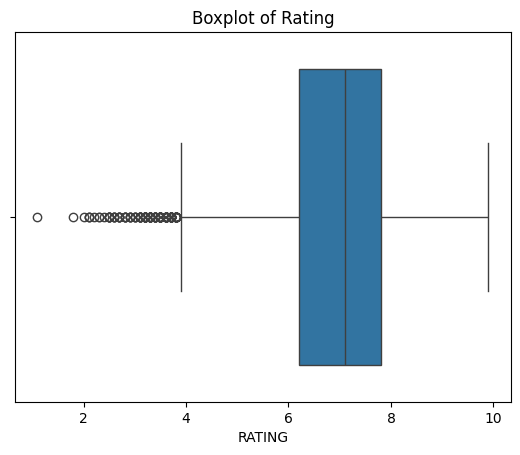

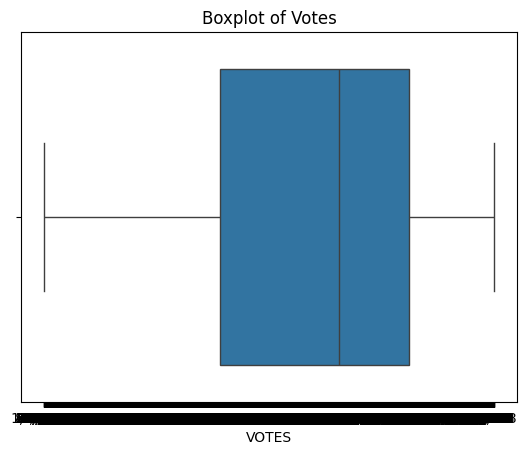

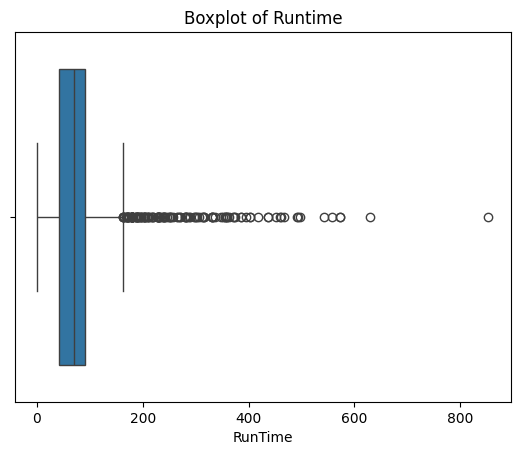

In [73]:
sns.boxplot(x=df['RATING'])
plt.title('Boxplot of Rating')
plt.show()

sns.boxplot(x=df['VOTES'])
plt.title('Boxplot of Votes')
plt.show()

sns.boxplot(x=df['RunTime'])
plt.title('Boxplot of Runtime')
plt.show()


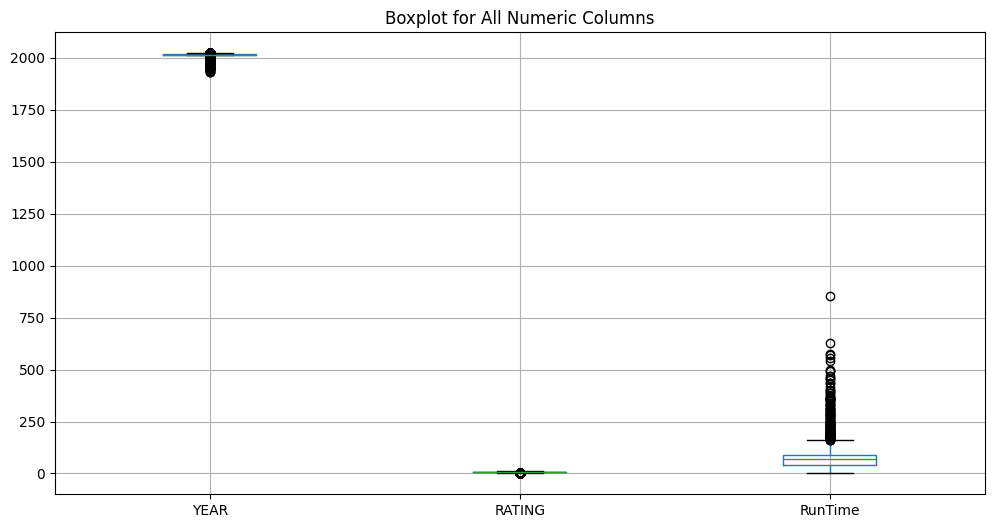

In [ ]:
df.boxplot(figsize=(12, 6))
plt.title('Boxplot for All Numeric Columns')
plt.show()


In [74]:
q1 = df['RATING'].quantile(0.25)
q3 = df['RATING'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [75]:
df = df[(df['RATING'] >= lower_bound) & (df['RATING'] <= upper_bound)]

In [ ]:
#df = df[(df['RATING'] >= 0)&(df['RATING']<=10)]

In [76]:
q1 = df['RunTime'].quantile(0.25)
q3 = df['RunTime'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [77]:
dF = df[(df['RunTime'] >= lower_bound) & (df['RunTime'] <= upper_bound)]

In [78]:
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[^\w\s]','',text)
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  words = [words for words in words if words not in stop_words]
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)


In [79]:
df['ONE-LINE'] = df['ONE-LINE'].apply(clean_text)

In [80]:
df.to_csv('cleaned_movies_dataset.csv', index=False)

FIRST MODEL Multinomial Naive Bayes

In [81]:
x = df['ONE-LINE']
y = df['label']

In [82]:
x_train_text,x_test_text,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [83]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train_text)
x_test = vectorizer.transform(x_test_text)

In [84]:
model = MultinomialNB(alpha=1)
model.fit(x_train,y_train)

MultinomialNB(alpha=1)

In [85]:
y_pred = model.predict(x_test)
y_pred,y_test

(array(['negative', 'negative', 'positive', ..., 'negative', 'positive',
        'positive'], dtype='<U8'),
 5004    negative
 2393    negative
 1861    negative
 4609    negative
 4758    negative
           ...   
 1565    negative
 6808    positive
 1326    positive
 1483    negative
 8404    positive
 Name: label, Length: 2401, dtype: object)

In [86]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6372344856309871
              precision    recall  f1-score   support

    negative       0.61      0.55      0.57      1075
    positive       0.66      0.71      0.68      1326

    accuracy                           0.64      2401
   macro avg       0.63      0.63      0.63      2401
weighted avg       0.63      0.64      0.63      2401

[[586 489]
 [382 944]]


In [87]:
print(df['label'].value_counts())

label
positive    4472
negative    3531
Name: count, dtype: int64


SECOND MODEL Bernoulli Naive Bayes

In [88]:
x = df['ONE-LINE']
y = df['label']

In [89]:
vectorizer_binary = CountVectorizer(binary=True)
x_vectorized_binary = vectorizer_binary.fit_transform(df['ONE-LINE'])

In [90]:
x_train_b, x_test_b,y_train_b,y_test_b = train_test_split(x_vectorized_binary,df['label'],test_size=0.2,random_state=42)

In [93]:
model2 = BernoulliNB()
model2.fit(x_train_b,y_train_b)

BernoulliNB()

In [94]:
y_pred_b = model2.predict(x_test_b)
y_pred_b,y_test_b

(array(['negative', 'positive', 'positive', ..., 'positive', 'negative',
        'positive'], dtype='<U8'),
 5004    negative
 2393    negative
 1861    negative
 4609    negative
 4758    negative
           ...   
 3700    negative
 6497    positive
 1124    positive
 3646    negative
 1161    negative
 Name: label, Length: 1601, dtype: object)

In [95]:
print(accuracy_score(y_test_b,y_pred_b))
print(classification_report(y_test_b,y_pred_b))
print(confusion_matrix(y_test_b,y_pred_b))

0.6445971267957527
              precision    recall  f1-score   support

    negative       0.62      0.51      0.56       711
    positive       0.66      0.75      0.70       890

    accuracy                           0.64      1601
   macro avg       0.64      0.63      0.63      1601
weighted avg       0.64      0.64      0.64      1601

[[361 350]
 [219 671]]
